<a href="https://colab.research.google.com/github/agutie22/Titanic-Project/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start the notebook;

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Mount your personal google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading in the data


In [ ]:
traindata=pd.read_csv('/content/drive/MyDrive/Titanic/train.csv')
testdata=pd.read_csv('/content/drive/MyDrive/Titanic/test.csv')
GenderSubmissiondata=pd.read_csv('/content/drive/MyDrive/Titanic/gender_submission.csv')

#Basic Data Exploration

In [ ]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
traindata['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

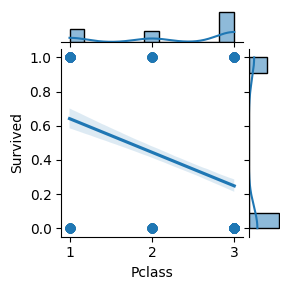

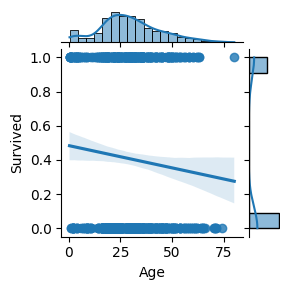

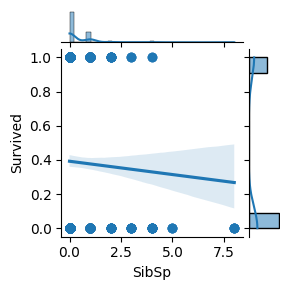

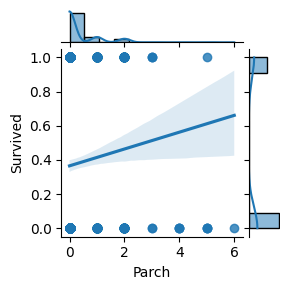

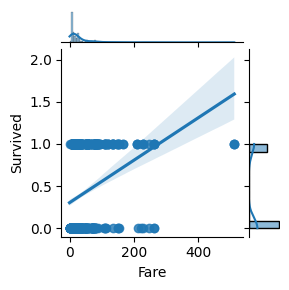

In [ ]:
cols=['Pclass', 'Age', 'SibSp', 'Parch',
       'Fare']
for c in cols:
  sns.jointplot(x=c,y='Survived',data=traindata,kind='reg',height=3)
plt.show()

<ipython-input-141-d6d72e1662d0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindata[c])


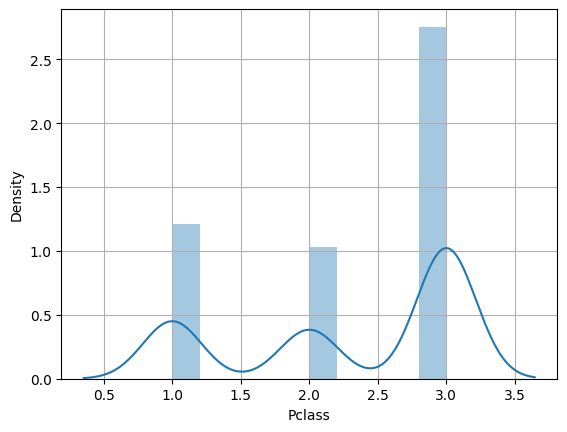

<ipython-input-141-d6d72e1662d0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindata[c])


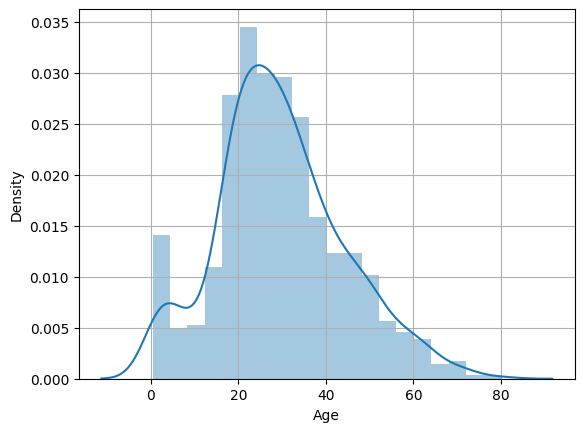

<ipython-input-141-d6d72e1662d0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindata[c])


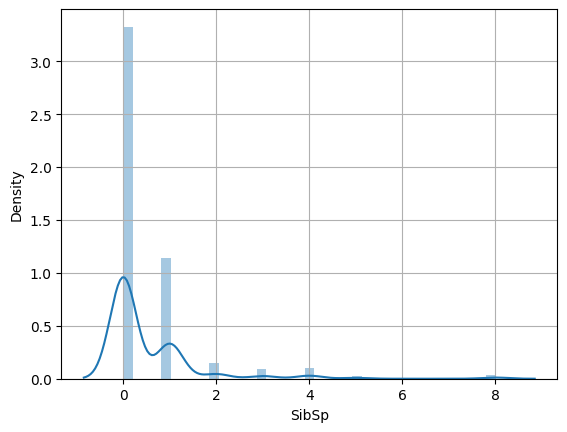

<ipython-input-141-d6d72e1662d0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindata[c])


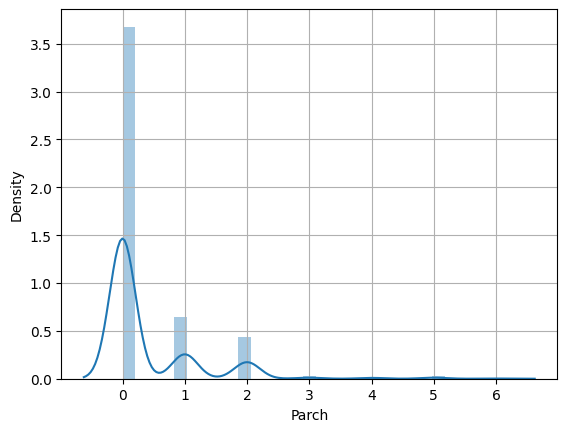

<ipython-input-141-d6d72e1662d0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindata[c])


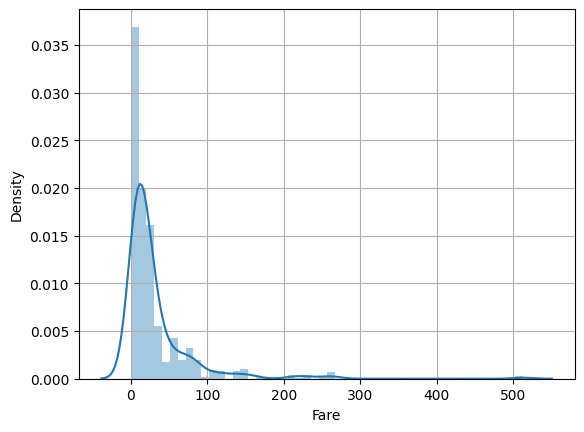

In [ ]:
cols=['Pclass', 'Age', 'SibSp', 'Parch',
       'Fare']
for c in cols:
  sns.distplot(traindata[c])
  plt.grid()
  plt.show()

#Cleaning the data


In [ ]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
traindata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###Name

In [ ]:
#Looked at the data in the excel and found that some people had a different title apart from Mr and Miss
#But the main issue is that this title is present in the middle of the name hece will have to split and strip in a weird manner
traindata['PassengerTitle'] = traindata['Name'].str.split(',').str[1].str.strip()
#This wil remove the First word of the name, Now we will strip again to get title which is the first word of the column now
traindata['PassengerTitle'] = traindata['PassengerTitle'].str.split('.').str[0].str.strip()
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
traindata['PassengerTitle'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: PassengerTitle, dtype: int64

In [ ]:
#This works here since the Survived are in a Binary input
Survival_Rate_Based_On_Title=(traindata.groupby('PassengerTitle')['Survived'].sum()/traindata['PassengerTitle'].value_counts())*100
Survival_Rate_Based_On_Title

Capt              0.000000
Col              50.000000
Don               0.000000
Dr               42.857143
Jonkheer          0.000000
Lady            100.000000
Major            50.000000
Master           57.500000
Miss             69.780220
Mlle            100.000000
Mme             100.000000
Mr               15.667311
Mrs              79.200000
Ms              100.000000
Rev               0.000000
Sir             100.000000
the Countess    100.000000
dtype: float64

For testdata do the same:

In [ ]:
testdata['PassengerTitle'] = testdata['Name'].str.split(',').str[1].str.strip()
#This wil remove the First word of the name, Now we will strip again to get title which is the first word of the column now
testdata['PassengerTitle'] = traindata['PassengerTitle'].str.split('.').str[0].str.strip()
testdata = testdata.drop(['Name', 'PassengerId'], axis=1)
testdata.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle
0,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,2,male,62.0,0,0,240276,9.6875,NaN,Q,Miss
3,3,male,27.0,0,0,315154,8.6625,NaN,S,Mrs
4,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mr


###Age


In [ ]:
#Checked Kaggle first to find the columns that had null Values
traindata.loc[traindata['Age'].isna(),'Age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [ ]:
PercentOfMissingAgeData=(177/891) *100
PercentOfMissingAgeData

19.865319865319865

In [ ]:
#20% is a lot of data and cannot be dropped
traindata['Age'].mean()

29.69911764705882

In [ ]:
#On the basis of the Exploratory Analysis the distribution is fairly normal and the mean is near the peak
#Hence the data will not be skewed if a specific direction if we put the mean in the null values
traindata.loc[traindata['Age'].isna(),'Age']=traindata['Age'].mean()
traindata['Age'] = traindata['Age'].round().astype(int)

traindata['Age'].mode() #Why mode?
traindata['Age'].mean()

29.754208754208754

In [ ]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr


<ipython-input-153-40dc20388b0f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindata['Age'])


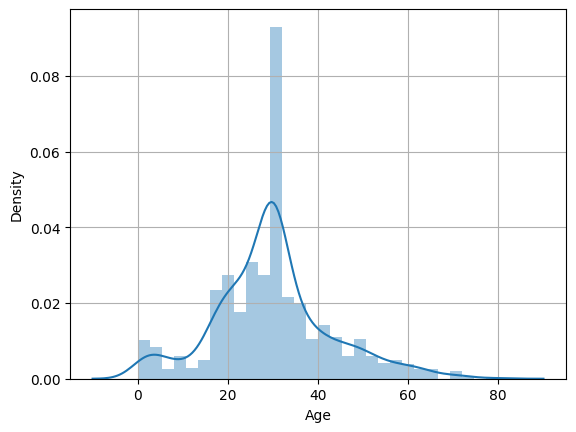

In [ ]:
sns.distplot(traindata['Age'])
plt.grid()
plt.show()

In [ ]:
traindata.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
PassengerTitle      0
dtype: int64

For test data do the same:

In [ ]:
testdata.loc[testdata['Age'].isna(),'Age']

10    NaN
22    NaN
29    NaN
33    NaN
36    NaN
       ..
408   NaN
410   NaN
413   NaN
416   NaN
417   NaN
Name: Age, Length: 86, dtype: float64

In [ ]:
PercentOfMissingAgeData=(86/417) *100
PercentOfMissingAgeData
testdata['Age'].mean()

30.272590361445783

In [ ]:
testdata.loc[testdata['Age'].isna(),'Age']=testdata['Age'].mean()
testdata['Age'] = testdata['Age'].round().astype(int)
testdata['Age'].mean()

30.20095693779904

In [ ]:
testdata.isnull().sum()

Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin             327
Embarked            0
PassengerTitle      0
dtype: int64

###Cabin

In [ ]:
#Initially had decided to drop the Cabin table
#But after some research found that only 1/3 of the people on the ship could have a cabin Which is similar to the not null values in the dataset
Missing_inputs_in_Cabin_column_percentage=(traindata['Cabin'].isna().sum()/len(traindata['Cabin'])) * 100
Missing_inputs_in_Cabin_column_percentage

77.10437710437711

In [ ]:
#Fillinng the missing values in the cabin section with letter N
traindata['Cabin'].fillna('N',inplace=True)

In [ ]:
#Converted all the inputs to string and used [0] to extract the first letter which is the Cabin Letter
#Converted all the inputs to string and used [1:] to extract the first letter which is the Cabin Number
traindata['CabinLetter']=traindata['Cabin'].apply(lambda x: str(x)[0])
traindata['CabinNumber']=traindata['Cabin'].apply(lambda x: str(x)[1:])

In [ ]:

traindata['CabinLetter']=traindata['Cabin'].apply(lambda x: str(x)[0])
traindata['CabinNumber']=traindata['Cabin'].apply(lambda x: str(x)[1:])

In [ ]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle,CabinLetter,CabinNumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S,Mr,N,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S,Miss,N,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S,Mr,N,


In [ ]:
#Might have to drop CabinNumber based on the number of different values
traindata['CabinLetter'].value_counts()
traindata['CabinNumber'].value_counts()

       691
33       7
6        6
49       5
2        5
      ... 
79       1
73       1
106      1
39       1
148      1
Name: CabinNumber, Length: 101, dtype: int64

In [ ]:
#Need to use () for Group by and use [] for putting the filter
Percentage_Of_People_Surving_In_Each_Cabin=traindata.groupby('CabinLetter')['Survived'].sum()/traindata['CabinLetter'].value_counts()
Percentage_Of_People_Surving_In_Each_Cabin

A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
N    0.299854
T    0.000000
dtype: float64

Do the same for test data;

In [ ]:
Missing_inputs_in_Cabin_column_percentage=(testdata['Cabin'].isna().sum()/len(testdata['Cabin'])) * 100
Missing_inputs_in_Cabin_column_percentage

78.22966507177034

In [ ]:
testdata.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle
0,3,male,34,0,0,330911,7.8292,NaN,Q,Mr
1,3,female,47,1,0,363272,7.0000,NaN,S,Mrs
2,2,male,62,0,0,240276,9.6875,NaN,Q,Miss
3,3,male,27,0,0,315154,8.6625,NaN,S,Mrs
4,3,female,22,1,1,3101298,12.2875,NaN,S,Mr


###Ticket

In [ ]:
#Trying to use Ticket column here to find if there is a certain type of differnce between people with a letter in their ticket
x=0
for i in traindata['Ticket']:
  if i.isnumeric():
    x=x+1

In [ ]:
traindata['TicketNumber']=traindata['Ticket'].apply(lambda x: x.isnumeric())

In [ ]:
#Somehow can't replace False values with 1, hence replaced them with 0 and true with 1
traindata['TicketNumber'] = traindata['TicketNumber'].replace(False, 0)
traindata['TicketNumber'] = traindata['TicketNumber'].replace(True, 1)
#traindata.head()

In [ ]:
traindata['TicketNumber'].value_counts()

1    661
0    230
Name: TicketNumber, dtype: int64

In [ ]:
#Based on our insights here the Ticket column is more or less useless since the survival rate is not affected by the letter on the ticket
Ticket_with_letter_survival_rate=(traindata.groupby('TicketNumber')['Survived'].sum()/traindata['TicketNumber'].value_counts())*100
Ticket_with_letter_survival_rate

0    38.260870
1    38.426626
dtype: float64

###Embarked

In [ ]:
#Checked Kaggle to find the null columns
traindata.loc[traindata['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle,CabinLetter,CabinNumber,TicketNumber
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN,Miss,B,28,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN,Mrs,B,28,1


In [ ]:
#We have only 2 missing values in embarked hence we are gonna use the mode of embarked here as the missing information is negligible
#And the data will not be skewed in a particular direction
#Had to use [0] in the first line since the mode returns a pandas series and we just want the first element of the series
most_common_value_in_embarked=traindata['Embarked'].mode()[0]
traindata.loc[traindata['Embarked'].isna(),'Embarked']=most_common_value_in_embarked
traindata.loc[traindata['Embarked'].isna(),'Embarked']

Series([], Name: Embarked, dtype: object)

In [ ]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle,CabinLetter,CabinNumber,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S,Mr,N,,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,C,85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S,Miss,N,,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,C,123,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S,Mr,N,,1


Do the same for test data

In [ ]:
testdata.loc[testdata['Embarked'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle


###Dropping irrelevant columns

In [ ]:
#Based on our insights we are dropping irrelevant columns

In [ ]:
traindata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerTitle',
       'CabinLetter', 'CabinNumber', 'TicketNumber'],
      dtype='object')

In [ ]:
#Kept TicketNumber as in some scenario it might be helpfull
#But not sure as based on our insights there really is no difference in survival rate
traindata=traindata.drop(columns=['PassengerId','Cabin','Name','Ticket','CabinNumber'])
traindata.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'PassengerTitle', 'CabinLetter', 'TicketNumber'],
      dtype='object')

In [ ]:
traindata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerTitle,CabinLetter,TicketNumber
0,0,3,male,22,1,0,7.2500,S,Mr,N,0
1,1,1,female,38,1,0,71.2833,C,Mrs,C,0
2,1,3,female,26,0,0,7.9250,S,Miss,N,0
3,1,1,female,35,1,0,53.1000,S,Mrs,C,1
4,0,3,male,35,0,0,8.0500,S,Mr,N,1


In [ ]:
cleantraindata=traindata

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #for accuracy_score
from sklearn.model_selection import train_test_split #for split the data

In [ ]:
cleantraindata["Survived"] = cleantraindata["Survived"].astype(int)
X= cleantraindata.drop("Survived", axis=1)
y = cleantraindata["Survived"]
#cleantraindata.head()

In [ ]:
X=pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8305084745762712

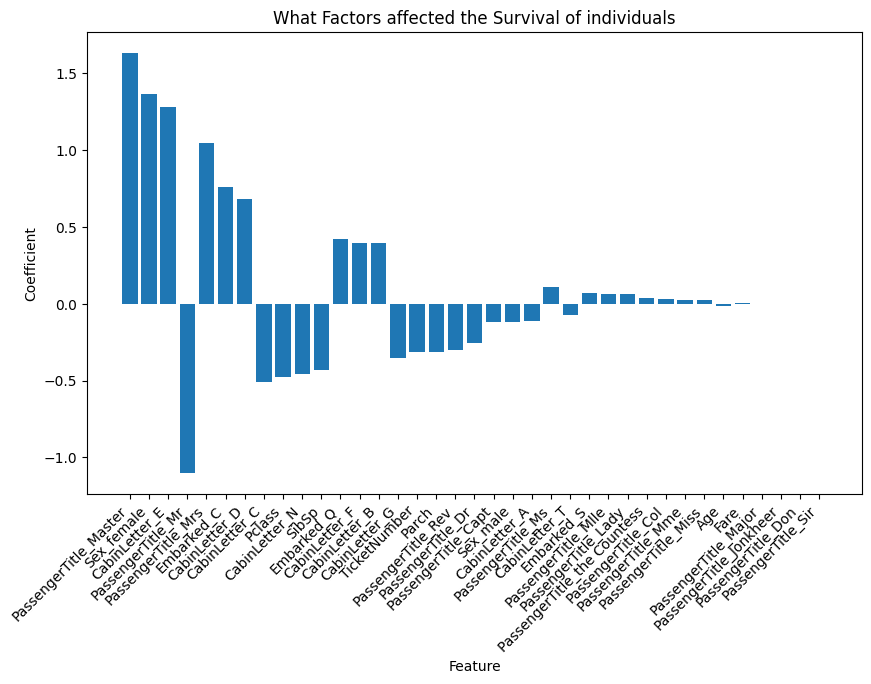

In [ ]:

coefficients = lr.coef_[0]
coefficient_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coefficient_df['AbsCoefficient'] = coefficient_df['Coefficient'].abs()
coefficient_df = coefficient_df.sort_values(by='AbsCoefficient', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(coefficient_df['Feature'], coefficient_df['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('What Factors affected the Survival of individuals')
plt.xticks(rotation=45, ha='right')
plt.show()

# Support Vector Machine

Import the support vector machine library

In [ ]:
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

Set the input and outout values from the trained dataset and convert ordinal data to nominal data

In [ ]:
y_svm = cleantraindata['Survived']
x_svm = cleantraindata.drop(['Survived'], axis = 1)
x_svm = pd.get_dummies(x_svm)
#x_svm = x_svm.drop(['CabinLetter_T'], axis = 1)

Fit the model based on the input and output data

In [ ]:
SVM_Model = SVC(kernel = 'linear', gamma='auto')
SVM_Model.fit(x_svm, y_svm)

SVC(gamma='auto', kernel='linear')

Check the accuracy

In [ ]:
print(f'Accuracy - : {SVM_Model.score(x_svm, y_svm): .3f}')

Accuracy - :  0.836


ValueError: ignored

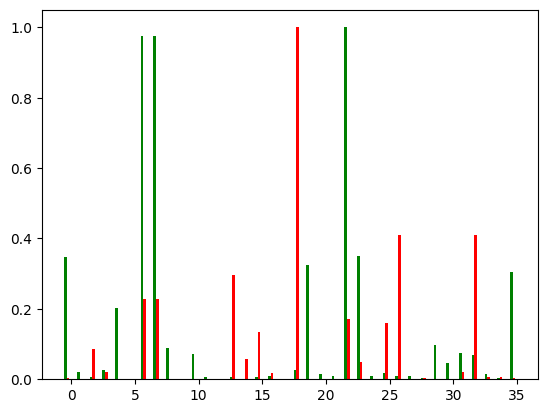

In [ ]:
plt.figure(1)
plt.clf()

X_indices = np.arange(x_svm.shape[-1])
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(x_svm, y_svm)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

###############################################################################
# Compare to the weights of an SVM

svm_weights = (SVM_Model.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()


These next steps were to prepare the test dataset for the prediction function

In [ ]:
testdata.isnull().sum()

Pclass                 0
Age                    0
SibSp                  0
Parch                  0
Fare                   1
                      ..
PassengerTitle_Miss    0
PassengerTitle_Mme     0
PassengerTitle_Mr      0
PassengerTitle_Mrs     0
PassengerTitle_Rev     0
Length: 457, dtype: int64

In [ ]:
most_common_value_in_fare=testdata['Fare'].mode()[0]
testdata.loc[testdata['Fare'].isna(),'Fare'] = most_common_value_in_fare

In [ ]:
#traindata.head()

In [ ]:
#testdata.head()

In [ ]:
testdata = pd.get_dummies(testdata)
#testprediction = SVM_Model.predict(testdata)
#testprediction

# Random Forrest

In [ ]:
traindata.head(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerTitle,CabinLetter,TicketNumber
0,0,3,male,22,1,0,7.2500,S,Mr,N,0
1,1,1,female,38,1,0,71.2833,C,Mrs,C,0
2,1,3,female,26,0,0,7.9250,S,Miss,N,0
3,1,1,female,35,1,0,53.1000,S,Mrs,C,1
4,0,3,male,35,0,0,8.0500,S,Mr,N,1
5,0,3,male,30,0,0,8.4583,Q,Mr,N,1
6,0,1,male,54,0,0,51.8625,S,Mr,E,1
7,0,3,male,2,3,1,21.0750,S,Master,N,1
8,1,3,female,27,0,2,11.1333,S,Mrs,N,1
9,1,2,female,14,1,0,30.0708,C,Mrs,N,1


In [ ]:
testdata.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle
0,3,male,34,0,0,330911,7.8292,NaN,Q,Mr
1,3,female,47,1,0,363272,7.0000,NaN,S,Mrs
2,2,male,62,0,0,240276,9.6875,NaN,Q,Miss
3,3,male,27,0,0,315154,8.6625,NaN,S,Mrs
4,3,female,22,1,1,3101298,12.2875,NaN,S,Mr


In [ ]:
combine = [traindata, testdata]

Convert categorical to numerical values for random forrest model:

1.Title:

In [ ]:
for dataset in combine:
    dataset['PassengerTitle'] = dataset['PassengerTitle'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['PassengerTitle'] = dataset['PassengerTitle'].replace('Mlle', 'Miss')
    dataset['PassengerTitle'] = dataset['PassengerTitle'].replace('Ms', 'Miss')
    dataset['PassengerTitle'] = dataset['PassengerTitle'].replace('Mme', 'Mrs')

traindata[['PassengerTitle', 'Survived']].groupby(['PassengerTitle'], as_index=False).mean()

,PassengerTitle,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.318182
5,the Countess,1.000000


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['PassengerTitle'] = dataset['PassengerTitle'].map(title_mapping)
    dataset['PassengerTitle'] = dataset['PassengerTitle'].fillna(0)

testdata.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle
0,3,male,34,0,0,330911,7.8292,NaN,Q,1
1,3,female,47,1,0,363272,7.0000,NaN,S,3
2,2,male,62,0,0,240276,9.6875,NaN,Q,2
3,3,male,27,0,0,315154,8.6625,NaN,S,3
4,3,female,22,1,1,3101298,12.2875,NaN,S,1


In [ ]:
traindata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerTitle,CabinLetter,TicketNumber
0,0,3,male,22,1,0,7.2500,S,1.0,N,0
1,1,1,female,38,1,0,71.2833,C,3.0,C,0
2,1,3,female,26,0,0,7.9250,S,2.0,N,0
3,1,1,female,35,1,0,53.1000,S,3.0,C,1
4,0,3,male,35,0,0,8.0500,S,1.0,N,1


Drop irrelevent features columns: Cabin(large percentage 70% missing for test file), Ticket/Number(equivalent impact 38% for either),

In [ ]:
traindata = traindata.drop(['TicketNumber', 'CabinLetter'], axis=1)
testdata = testdata.drop(['Ticket', 'Cabin'], axis=1)
combine = [traindata, testdata]

In [ ]:
traindata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerTitle
0,0,3,male,22,1,0,7.2500,S,1.0
1,1,1,female,38,1,0,71.2833,C,3.0
2,1,3,female,26,0,0,7.9250,S,2.0
3,1,1,female,35,1,0,53.1000,S,3.0
4,0,3,male,35,0,0,8.0500,S,1.0


2.Sex

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
traindata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerTitle
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0


In [ ]:
testdata.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerTitle
0,3,0,34,0,0,7.8292,Q,1
1,3,1,47,1,0,7.0000,S,3
2,2,0,62,0,0,9.6875,Q,2
3,3,0,27,0,0,8.6625,S,3
4,3,1,22,1,1,12.2875,S,1


3. Embarked:

In [ ]:
traindata[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

traindata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerTitle
0,0,3,0,22,1,0,7.2500,0,1.0
1,1,1,1,38,1,0,71.2833,1,3.0
2,1,3,1,26,0,0,7.9250,0,2.0
3,1,1,1,35,1,0,53.1000,0,3.0
4,0,3,0,35,0,0,8.0500,0,1.0


Replace age with ordinals based on age bands (correlations with Survived):

In [ ]:
traindata['AgeBand'] = pd.cut(traindata['Age'], 4)
traindata[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 20.0]",0.455556
1,"(20.0, 40.0]",0.364121
2,"(40.0, 60.0]",0.396825
3,"(60.0, 80.0]",0.227273


In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 20, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 40), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60), 'Age'] = 2
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 3
traindata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerTitle,AgeBand
0,0,3,0,1,1,0,7.2500,0,1.0,"(20.0, 40.0]"
1,1,1,1,1,1,0,71.2833,1,3.0,"(20.0, 40.0]"
2,1,3,1,1,0,0,7.9250,0,2.0,"(20.0, 40.0]"
3,1,1,1,1,1,0,53.1000,0,3.0,"(20.0, 40.0]"
4,0,3,0,1,0,0,8.0500,0,1.0,"(20.0, 40.0]"


In [ ]:
traindata = traindata.drop(['AgeBand'], axis=1)
combine = [traindata, testdata]
traindata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerTitle
0,0,3,0,1,1,0,7.2500,0,1.0
1,1,1,1,1,1,0,71.2833,1,3.0
2,1,3,1,1,0,0,7.9250,0,2.0
3,1,1,1,1,1,0,53.1000,0,3.0
4,0,3,0,1,0,0,8.0500,0,1.0


Replace fare with ordinals based on fare bands (correlations with Survival):

In [ ]:
testdata['Fare'].fillna(testdata['Fare'].dropna().median(), inplace=True)
testdata.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerTitle
0,3,0,1,0,0,7.8292,2,1
1,3,1,2,1,0,7.0000,0,3
2,2,0,3,0,0,9.6875,2,2
3,3,0,1,0,0,8.6625,0,3
4,3,1,1,1,1,12.2875,0,1


In [ ]:
traindata['FareBand'] = pd.qcut(traindata['Fare'], 5)
traindata[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

traindata = traindata.drop(['FareBand'], axis=1)
combine = [traindata, testdata]

traindata.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerTitle
0,0,3,0,1,1,0,0,0,1.0
1,1,1,1,1,1,0,4,1,3.0
2,1,3,1,1,0,0,1,0,2.0
3,1,1,1,1,1,0,4,0,3.0
4,0,3,0,1,0,0,1,0,1.0
5,0,3,0,1,0,0,1,2,1.0
6,0,1,0,2,0,0,4,0,1.0
7,0,3,0,0,3,1,2,0,4.0
8,1,3,1,1,0,2,2,0,3.0
9,1,2,1,0,1,0,3,1,3.0


In [ ]:
X_train = traindata.drop("Survived", axis=1)
Y_train = traindata["Survived"]
X_test  = testdata.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Model training:

In [ ]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=700)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.0

In [ ]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
all_features = traindata.drop("Survived",axis=1)
Targeted_feature = traindata["Survived"]
x_train,x_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 8), (268, 8), (623,), (268,))

The cross validated score for Random Forest Classifier is: 81.49


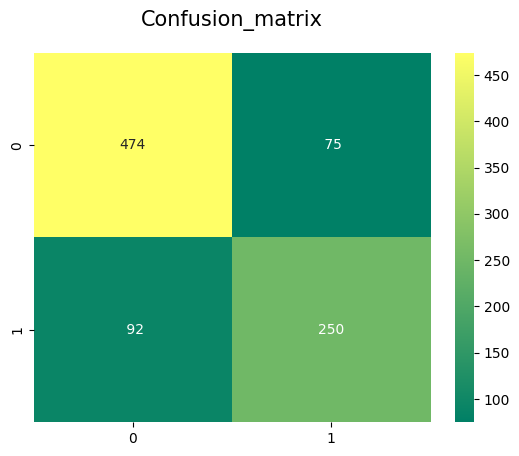

In [ ]:
kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(random_forest, all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(random_forest,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15);

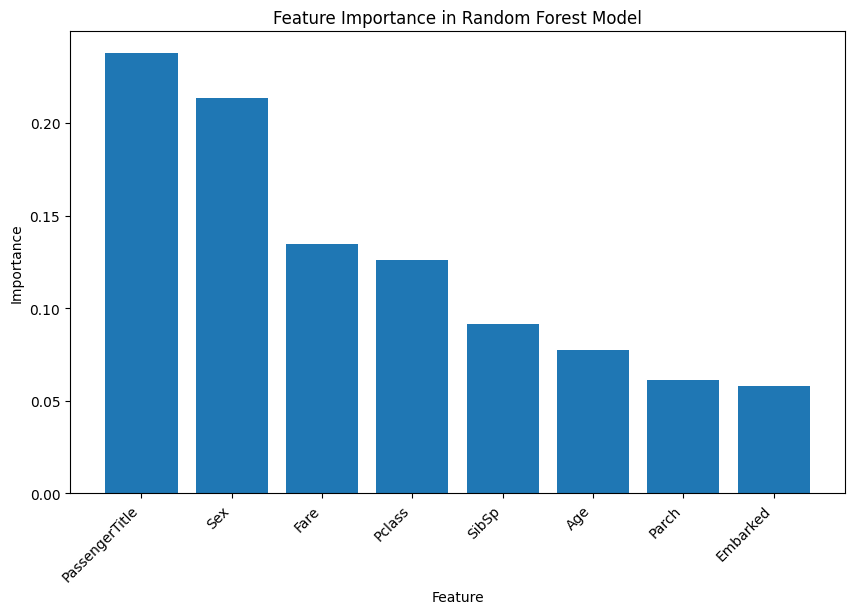

In [ ]:
# Assuming you have already trained your random_forest model
# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)

# Get feature importances
importances = random_forest.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.show()